In [98]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')   

In [99]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install tensorflow==2.17.0

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df = pd.read_csv("consumer_complaints.csv/consumer_complaints.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_5488\1074411444.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("consumer_complaints.csv/consumer_complaints.csv")


In [ ]:
df.head()

date_received           product               sub_product  \
0    08/30/2013          Mortgage            Other mortgage   
1    08/30/2013          Mortgage            Other mortgage   
2    08/30/2013  Credit reporting                       NaN   
3    08/30/2013      Student loan  Non-federal student loan   
4    08/30/2013   Debt collection               Credit card   

                                      issue  \
0  Loan modification,collection,foreclosure   
1  Loan servicing, payments, escrow account   
2    Incorrect information on credit report   
3                        Repaying your loan   
4        False statements or representation   

                           sub_issue consumer_complaint_narrative  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                     Account status                          NaN   
3                 Repaying your loan                          NaN   
4  Attempted to collect wrong amount                          NaN   

  company_public_response                          company state zipcode tags  \
0                     NaN                     U.S. Bancorp    CA   95993  NaN   
1                     NaN            Wells Fargo & Company    CA   91104  NaN   
2                     NaN            Wells Fargo & Company    NY   11764  NaN   
3                     NaN          Navient Solutions, Inc.    MD   21402  NaN   
4                     NaN  Resurgent Capital Services L.P.    GA   30106  NaN   

  consumer_consent_provided submitted_via date_sent_to_company  \
0                       NaN      Referral           09/03/2013   
1                       NaN      Referral           09/03/2013   
2                       NaN   Postal mail           09/18/2013   
3                       NaN         Email           08/30/2013   
4                       NaN           Web           08/30/2013   

  company_response_to_consumer timely_response consumer_disputed?  \
0      Closed with explanation             Yes                Yes   
1      Closed with explanation             Yes                Yes   
2      Closed with explanation             Yes                 No   
3      Closed with explanation             Yes                Yes   
4      Closed with explanation             Yes                Yes   

   complaint_id  
0        511074  
1        511080  
2        510473  
3        510326  
4        511067

In [ ]:
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [ ]:
df.describe(include='all')

date_received   product     sub_product  \
count         555957    555957          397635   
unique          1608        11              46   
top       08/27/2015  Mortgage  Other mortgage   
freq             963    186475           74319   
mean             NaN       NaN             NaN   
std              NaN       NaN             NaN   
min              NaN       NaN             NaN   
25%              NaN       NaN             NaN   
50%              NaN       NaN             NaN   
75%              NaN       NaN             NaN   
max              NaN       NaN             NaN   

                                           issue       sub_issue  \
count                                     555957          212622   
unique                                        95              68   
top     Loan modification,collection,foreclosure  Account status   
freq                                       97191           26798   
mean                                         NaN             NaN   
std                                          NaN             NaN   
min                                          NaN             NaN   
25%                                          NaN             NaN   
50%                                          NaN             NaN   
75%                                          NaN             NaN   
max                                          NaN             NaN   

                             consumer_complaint_narrative  \
count                                               66806   
unique                                              65646   
top     This company continues to report on my credit ...   
freq                                                   37   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                 company_public_response          company  \
count                                              85124           555957   
unique                                                10             3605   
top     Company chooses not to provide a public response  Bank of America   
freq                                               52478            55998   
mean                                                 NaN              NaN   
std                                                  NaN              NaN   
min                                                  NaN              NaN   
25%                                                  NaN              NaN   
50%                                                  NaN              NaN   
75%                                                  NaN              NaN   
max                                                  NaN              NaN   

         state zipcode            tags consumer_consent_provided  \
count   551070  551452           77959                    123458   
unique      62   27052               3                         4   
top         CA   300XX  Older American          Consent provided   
freq     81700    1205           45257                     66807   
mean       NaN     NaN             NaN                       NaN   
std        NaN     NaN             NaN                       NaN   
min        NaN     NaN             NaN                       NaN   
25%        NaN     NaN             NaN                       NaN   
50%        NaN     NaN             NaN                       NaN   
75%        NaN     NaN             NaN                       NaN   
max        NaN     NaN             NaN                       NaN   

       submitted_via date_sent_to_company company_response_to_consumer  \
count         555957               55595

In [ ]:
df.isnull().sum()/df.shape[0]*100

date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

In [ ]:
df1 = df[['complaint_id','date_received','product','issue','company','state','submitted_via','company_response_to_consumer','timely_response','consumer_disputed?','consumer_complaint_narrative']]

In [ ]:
df1 = df1[pd.notnull(df1['consumer_complaint_narrative'])]

EDA

<Axes: xlabel='product', ylabel='count'>

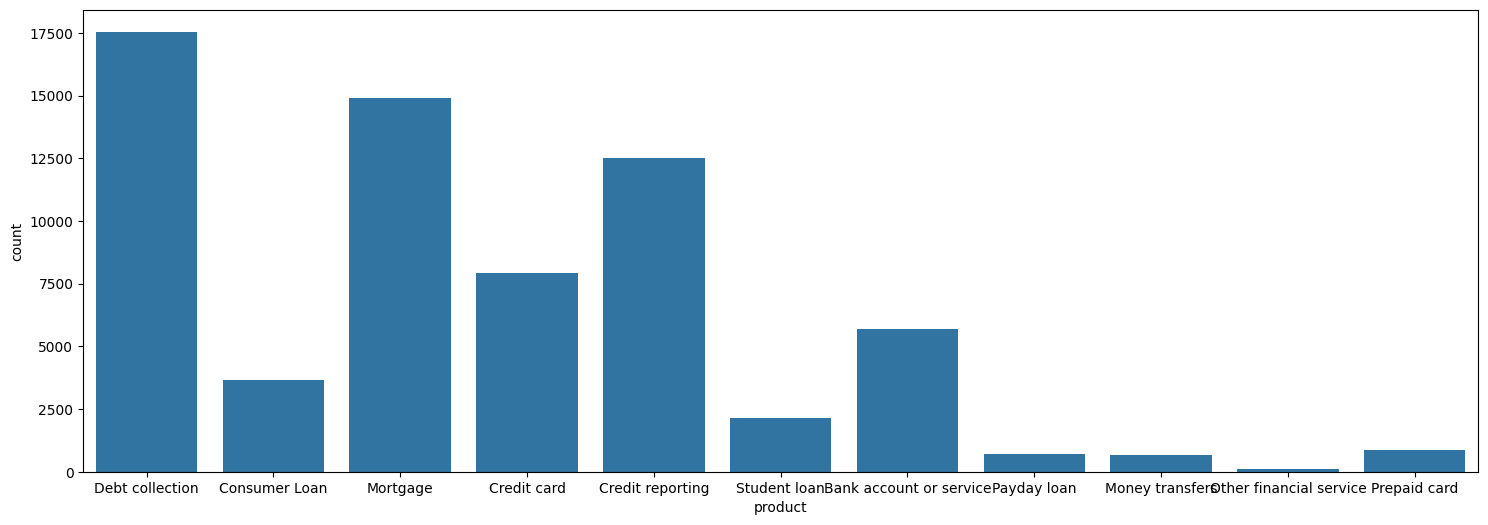

In [ ]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=df1)

<Axes: xlabel='product'>

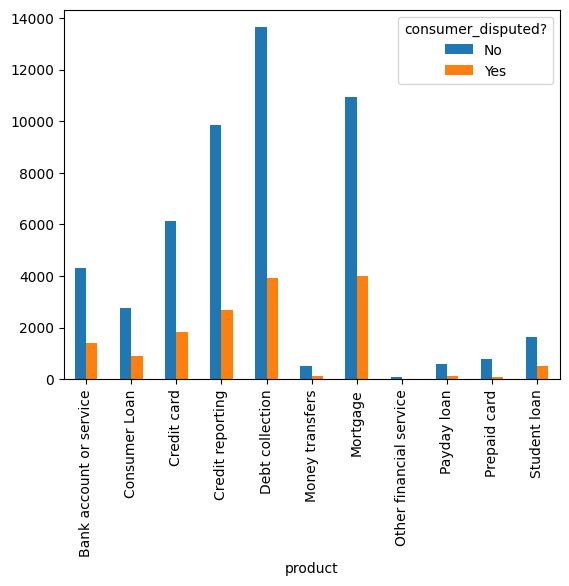

In [ ]:
pd.crosstab(df1['product'],df1['consumer_disputed?']).plot(kind='bar')

In [ ]:
df1['date_received'] = pd.to_datetime(df1['date_received'])

In [ ]:
df1.date_received.min(),df1.date_received.max()

(Timestamp('2015-03-19 00:00:00'), Timestamp('2016-04-20 00:00:00'))

In [ ]:
df1['month'] = df1['date_received'].dt.month

<Axes: xlabel='month', ylabel='count'>

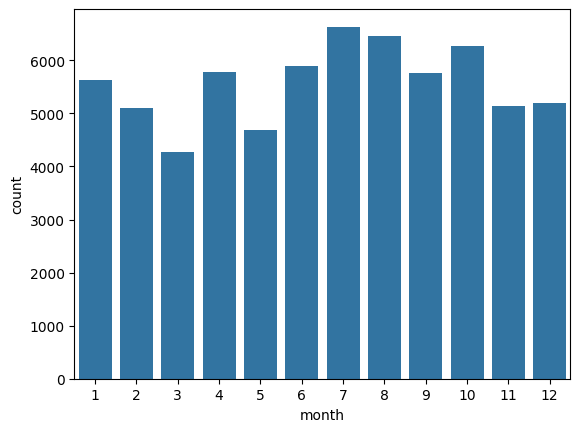

In [ ]:
sns.countplot(x='month',data=df1)

<Axes: xlabel='timely_response', ylabel='count'>

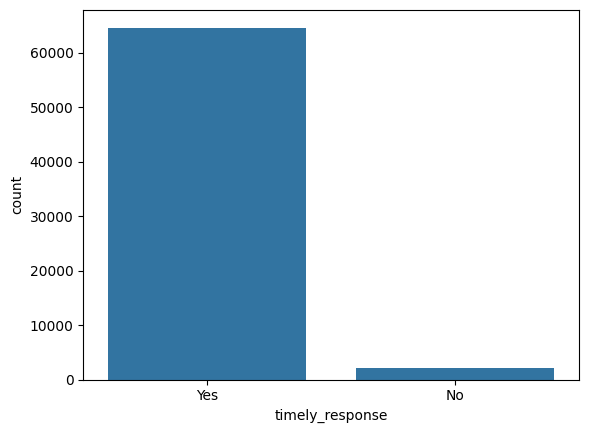

In [ ]:
sns.countplot(x='timely_response',data=df1)

Text Data Preprocessing

In [ ]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [ ]:
df1['consumer_complaint_narrative'].sample(3)

262564    i opened a xxxx xxxx account on xx/xx/xxxx. xx...
525450    a collection agency first national collection ...
265606    i received a telephone call from debt recovery...
Name: consumer_complaint_narrative, dtype: object

In [ ]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")

In [ ]:
df1['consumer_complaint_narrative'].sample(3)

275349    in an effort to improve my credit history i pa...
516973    here 's another complaint about wells fargo pl...
292068    it is a long complicated issue. it started wit...
Name: consumer_complaint_narrative, dtype: object

Text Standardization

In [ ]:
dico = {}
dico1 = open('consumer_complaints.csv/doc1.txt', 'rb')
for word in dico1:
    word = word.decode('utf8')
    word = word.split()
    dico[word[1]] = word[3]
dico1.close()
dico2 = open('consumer_complaints.csv/doc2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()
dico3 = open('consumer_complaints.csv/doc3.txt', 'rb')
for word in dico3:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico3.close()

In [ ]:
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [ ]:
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].apply(txt_std)

In [ ]:
df1.consumer_complaint_narrative.head()

190126    xxxx has claimed i owe them {$27.00} for xxxx ...
190135    due to inconsistencies in the amount owed that...
190155    in xx/xx/xxxx my wages that i earned at my job...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xx/xx/xxxx. at the time i s...
Name: consumer_complaint_narrative, dtype: object

In [ ]:
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].str.replace(r"xx+\s","")

In [ ]:
df1['consumer_complaint_narrative'].head()

190126    xxxx has claimed i owe them {$27.00} for xxxx ...
190135    due to inconsistencies in the amount owed that...
190155    in xx/xx/xxxx my wages that i earned at my job...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xx/xx/xxxx. at the time i s...
Name: consumer_complaint_narrative, dtype: object

Remove stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [ ]:
df1['consumer_complaint_narrative'].head()

190126    xxxx claimed owe {$27.00} xxxx years despite p...
190135    due inconsistencies amount owed told & bank am...
190155    xx/xx/xxxx wages earned job decreased almost h...
190207    open current mortgage chase bank # xxxx. chase...
190208    xxxx submitted xx/xx/xxxx. time submitted comp...
Name: consumer_complaint_narrative, dtype: object

Correcting spelling

In [ ]:
from textblob import TextBlob
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: str(TextBlob(x).correct()))

Lemmatizing

In [ ]:
from textblob import Word

df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))

In [ ]:
df1.consumer_complaint_narrative.head()

190126    xxxx claimed owe {$27.00} xxxx year despite pr...
190135    due inconsistency amount owed told & bank amou...
190155    xx/xx/xxxx wage earned job decreased almost ha...
190207    open current mortgage chase bank # xxxx. chase...
190208    xxxx submitted xx/xx/xxxx. time submitted comp...
Name: consumer_complaint_narrative, dtype: object

Word Cloud for all Product categories

Debt collection


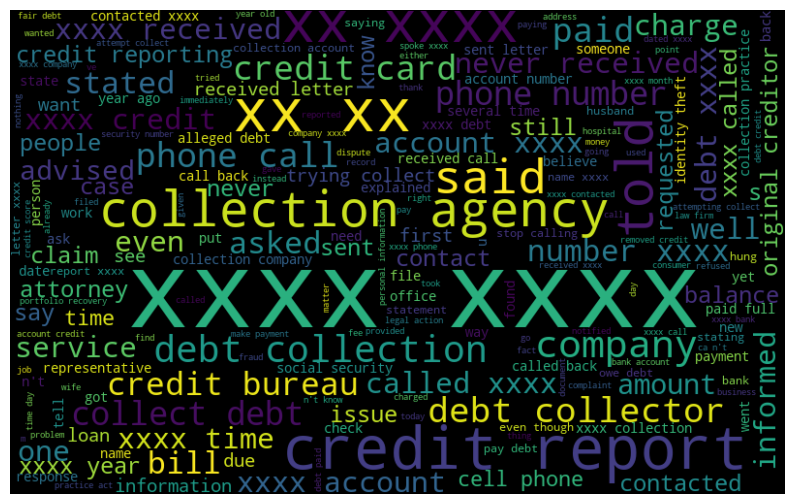

Consumer Loan


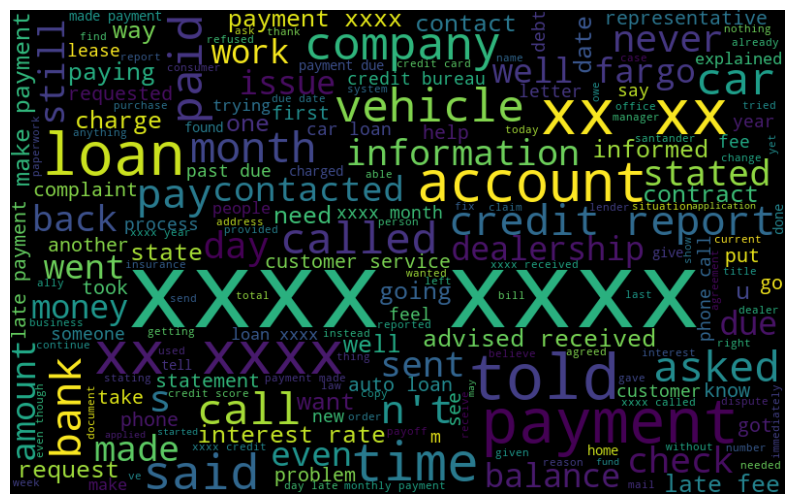

Mortgage


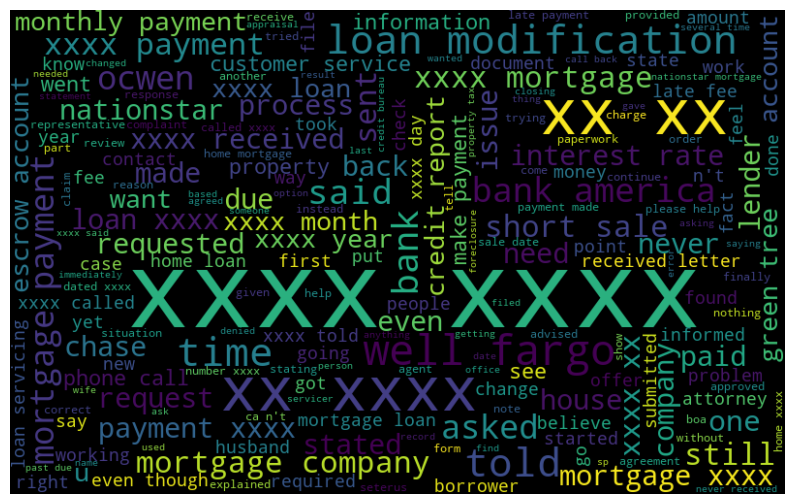

Credit card


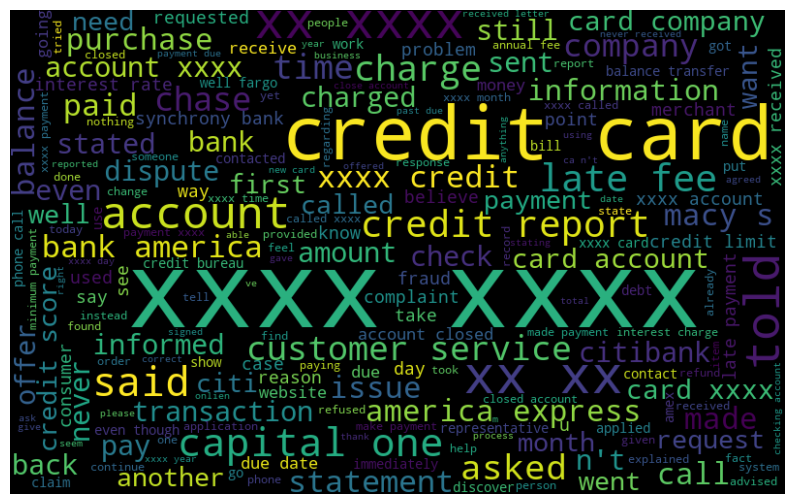

Credit reporting


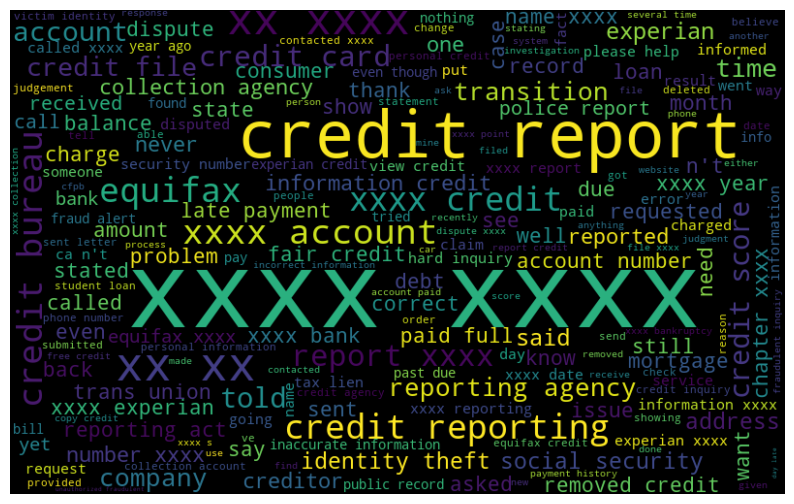

Student loan


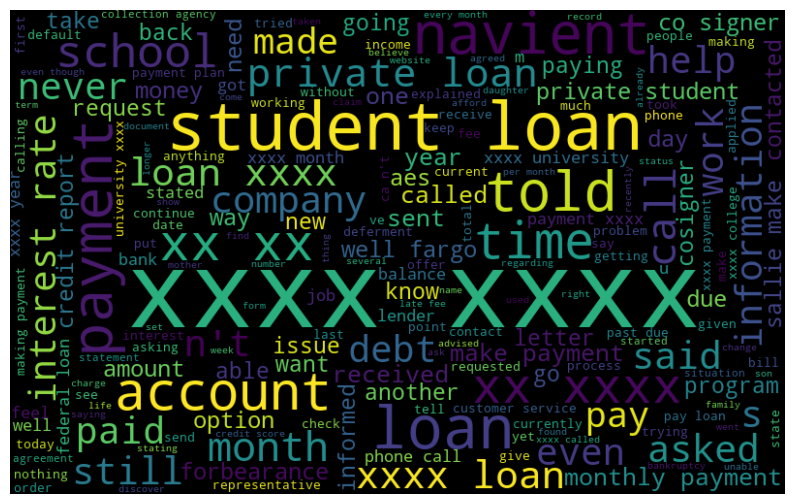

Bank account or service


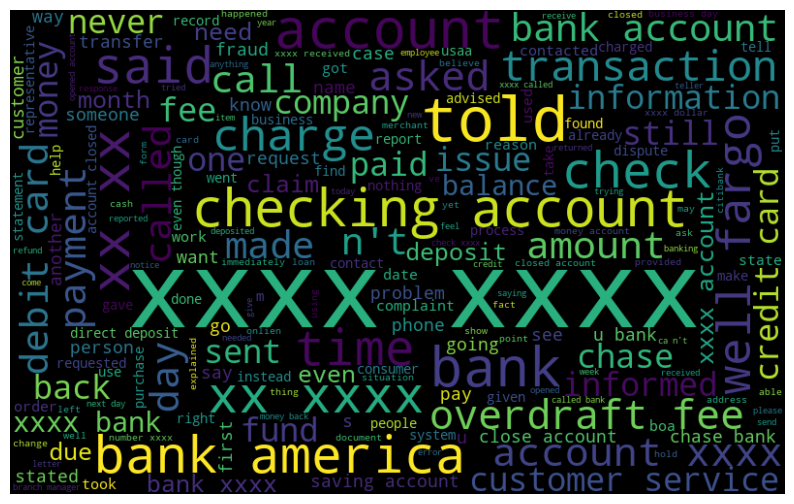

Payday loan


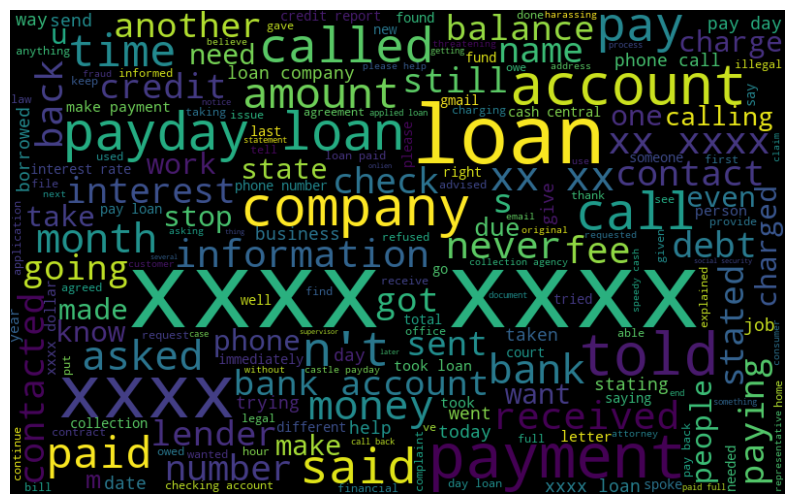

Money transfers


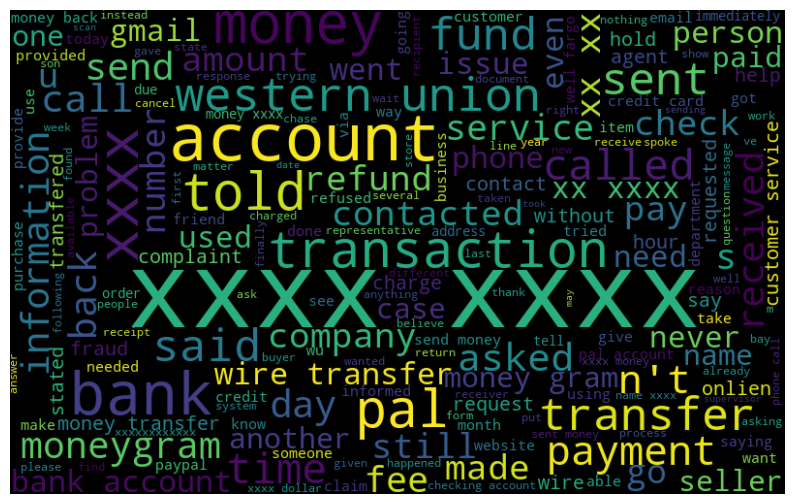

Other financial service


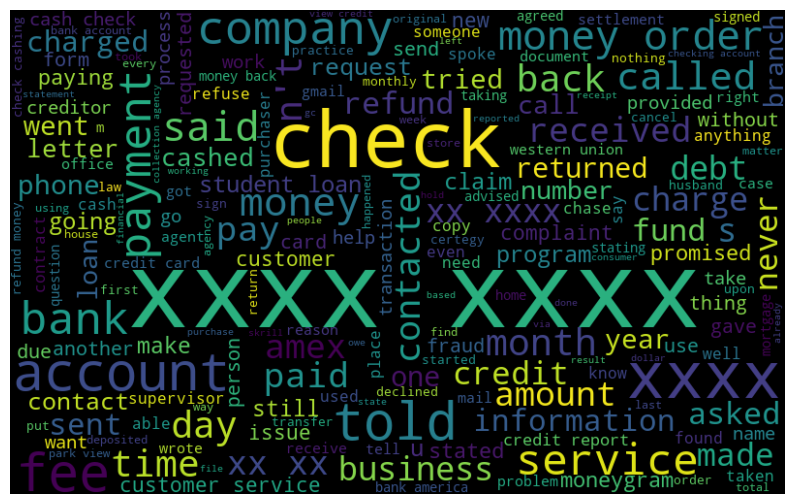

Prepaid card


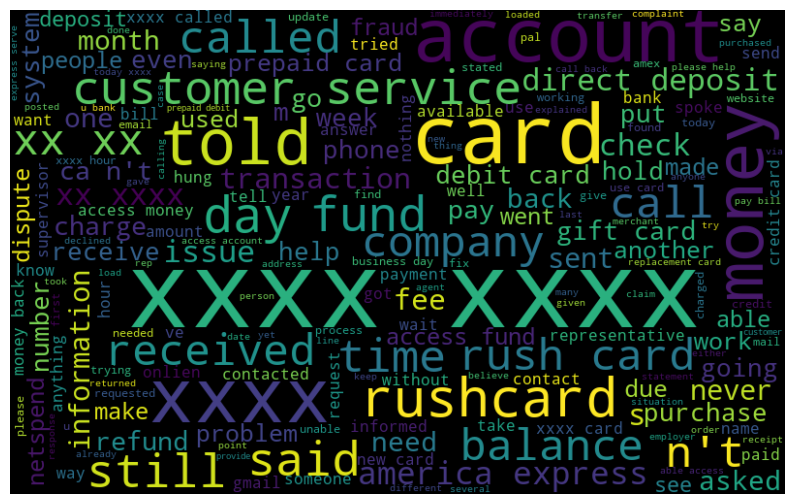

In [ ]:
for product_name in df1['product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df1.loc[df1['product'].str.contains(product_name),'consumer_complaint_narrative']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Train/test split

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(df1['consumer_complaint_narrative'], df1['product'],stratify=df1['product'], test_size=0.25)

Feature engineering of consumer complaint with TF-IDF

In [ ]:
##label encoding target variable
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)

In [ ]:
##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df1['consumer_complaint_narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,train_y)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(multi_class='warn', solver='warn'),
             n_jobs=-1, param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score='warn')

In [ ]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 2}
0.8478365611855821


In [ ]:
final_lr = LogisticRegression(C=2)
final_lr.fit(xtrain_tfidf,train_y)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2)

In [ ]:
LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=2, multi_class='warn', solver='warn')

In [ ]:
final_lr_predict = final_lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.8474434199497066


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, final_lr_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.79      0.80      1428
          Consumer Loan       0.76      0.63      0.69       920
               Mortgage       0.80      0.82      0.81      1982
            Credit card       0.85      0.86      0.85      3132
       Credit reporting       0.83      0.88      0.85      4388
           Student loan       0.76      0.61      0.68       166
Bank account or service       0.93      0.94      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.66      0.40      0.50       182
Other financial service       0.81      0.77      0.79       215
           Prepaid card       0.89      0.80      0.84       532

               accuracy                           0.85     16702
              macro avg       0.74      0.68      0.70     16702
           weighted avg       0.84      0.85      0.85     16702



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

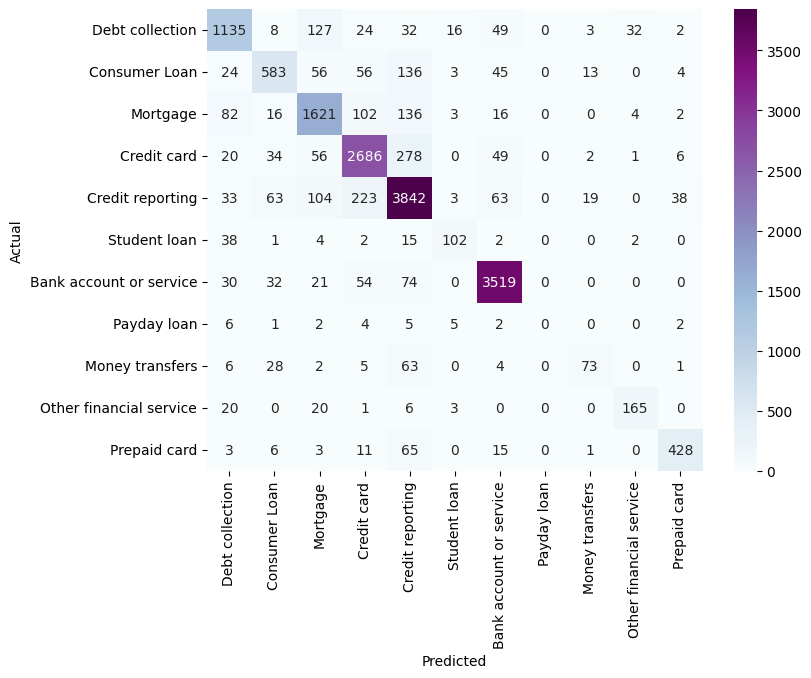

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, final_lr_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

SVM

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]})

In [ ]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(dual=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score='warn')

In [ ]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1}
0.8445833450353062


In [ ]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,train_y)

LinearSVC(C=0.1)

In [ ]:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC(C=0.1, dual=True)

In [ ]:
final_svc_predict = final_svc.predict(xvalid_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.8454676086696205


In [ ]:
print(classification_report(valid_y, final_svc_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.79      0.80      1428
          Consumer Loan       0.80      0.59      0.68       920
               Mortgage       0.79      0.82      0.81      1982
            Credit card       0.85      0.84      0.85      3132
       Credit reporting       0.82      0.89      0.85      4388
           Student loan       0.80      0.57      0.66       166
Bank account or service       0.93      0.95      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.68      0.27      0.39       182
Other financial service       0.82      0.67      0.73       215
           Prepaid card       0.87      0.81      0.84       532

               accuracy                           0.85     16702
              macro avg       0.74      0.66      0.69     16702
           weighted avg       0.84      0.85      0.84     16702



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

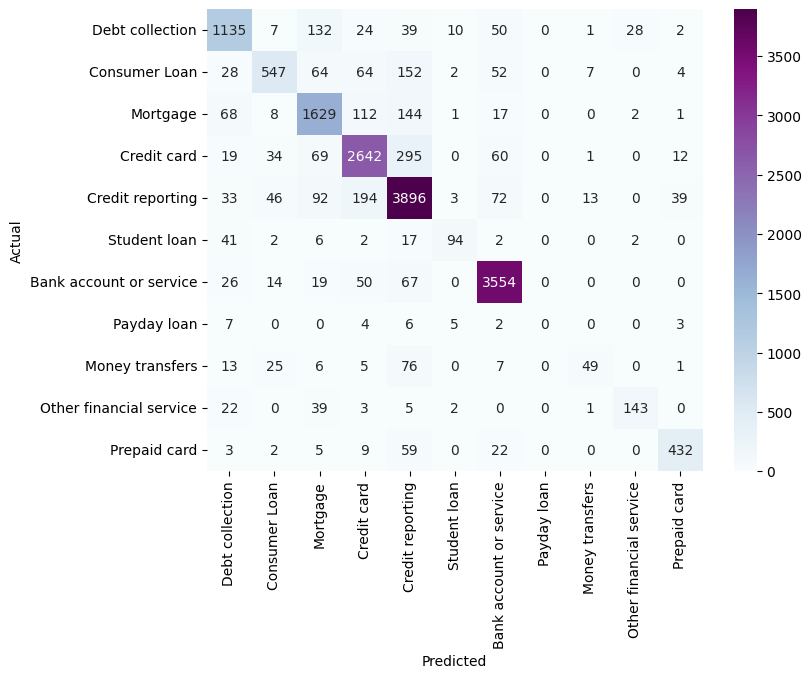

In [ ]:
conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install --upgrade xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.2/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.3/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 0.5/124.9 MB 3.0 MB/s eta 0:00:43
   ---------------------------------------- 0.6/124.9 MB 3.1 MB/s eta 0:00:41
   ---------------------------------------- 0.7/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 0.9/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.1/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 1.2/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.4/124.9 MB 3.5 MB/s eta 0:00:36


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:


xgb_model = XGBClassifier(
    max_depth=10,            # Reduced from 50
    n_estimators=50,         # Start with fewer estimators
    learning_rate=0.1,
    device='gpu',
    colsample_bytree=0.7,
    gamma=0,
    reg_alpha=4,
    subsample=0.8,
    tree_method='gpu_hist'   # Use GPU if available
)

xgb_model.fit(
    xtrain_tfidf, train_y, 
     
    eval_set=[(xvalid_tfidf, valid_y)], 
    verbose=True
)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:12:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:2.10615
[1]	validation_0-mlogloss:1.91440
[2]	validation_0-mlogloss:1.76282
[3]	validation_0-mlogloss:1.64058
[4]	validation_0-mlogloss:1.53089
[5]	validation_0-mlogloss:1.44321
[6]	validation_0-mlogloss:1.36362
[7]	validation_0-mlogloss:1.29338
[8]	validation_0-mlogloss:1.23075
[9]	validation_0-mlogloss:1.17481
[10]	validation_0-mlogloss:1.12786
[11]	validation_0-mlogloss:1.08387
[12]	validation_0-mlogloss:1.04395
[13]	validation_0-mlogloss:1.00588
[14]	validation_0-mlogloss:0.97196
[15]	validation_0-mlogloss:0.94100
[16]	validation_0-mlogloss:0.91429
[17]	validation_0-mlogloss:0.88885
[18]	validation_0-mlogloss:0.86479
[19]	validation_0-mlogloss:0.84214
[20]	validation_0-mlogloss:0.82222
[21]	validation_0-mlogloss:0.80316
[22]	validation_0-mlogloss:0.78694
[23]	validation_0-mlogloss:0.77057
[24]	validation_0-mlogloss:0.75553
[25]	validation_0-mlogloss:0.74145
[26]	validation_0-mlogloss:0.72873
[27]	validation_0-mlogloss:0.71701
[28]	validation_0-mlogloss:0.7

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_predict = xgb_model.predict(xvalid_tfidf)
xgb_accuracy = metrics.accuracy_score(xgb_predict, valid_y)
print ("XGBoost > Accuracy: ", xgb_accuracy)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the boo

XGBoost > Accuracy:  0.8258891150760388


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, xgb_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.80      0.76      0.78      1428
          Consumer Loan       0.76      0.60      0.67       920
               Mortgage       0.79      0.79      0.79      1982
            Credit card       0.82      0.83      0.82      3132
       Credit reporting       0.80      0.86      0.83      4388
           Student loan       0.77      0.58      0.66       166
Bank account or service       0.91      0.94      0.92      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.64      0.35      0.45       182
Other financial service       0.80      0.73      0.76       215
           Prepaid card       0.84      0.80      0.82       532

               accuracy                           0.83     16702
              macro avg       0.72      0.66      0.68     16702
           weighted avg       0.82      0.83      0.82     16702



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

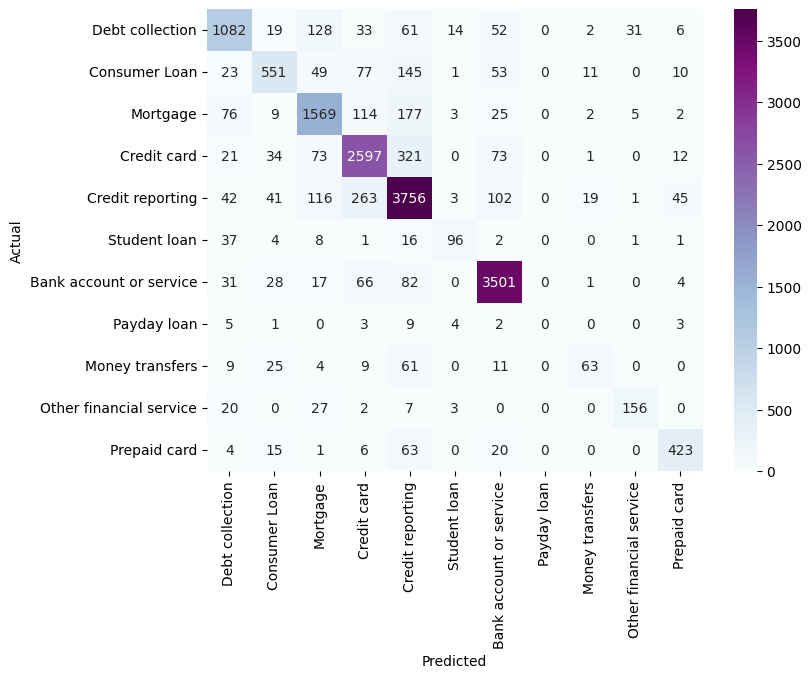

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, xgb_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()